# Table of Content

1. [Problem Statement](#Problem_Statement)
2. [Libraries](#libraries)
3. [Read Datasets](#read-datasets)
4. [EDA](#EDA)
5. [Exploratory Visualization](#exploratory-visualization)
6. [Data Cleaning](#data-cleaning)
7. [Preprocessing](#preprocessing)
8. [Baseline Model](#baseline-model)
9. [Modeling Part 1](#modeling-part-1)
10. [Data Processing Part 2](#data-processing-part-2-optimization)
11. [Modeling Part 2](#modeling-part-2)
12. [Modeling Part 3](#modeling-part-3)
13. [Prediction](#prediction-with-test-set) 
14. [Conclusion](#conclusion)

# Problem Statement

As a property agency, it is very important to us that we are able to estimate what is the estimated worth of the property. By predicting the worth of a property accurately, we have higher confidence in selling the property and also receiving our well deserved commission. There are many manipulating variables that are affecting the price of a property. We will make use of regression model to estimate the SalePrice of a property and measure how well is our prediction and the actual SalePrice.

## Libraries

In [130]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from math import ceil, sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches
from itertools import zip_longest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

## Read Datasets

In [131]:
# Read the original train dataset.
train_ori = pd.read_csv('datasets/train.csv') 

# Read the original test dataset.
test_ori = pd.read_csv('datasets/test.csv')   

## EDA

In [132]:
train_ori.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [133]:
test_ori.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [134]:
train_ori.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [135]:
train_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [136]:
train_ori.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

Let's determine which features have missing value and what does the missing value mean. The features with missing values are:
1. Lot Frontage - We can assume that the unit is an apartment or condominium so it does not have lot frontage. However, looking through the MSSubclass, there is not any apartment or condominium. Therefore, we will need to impute the missing value.
2. Alley - It can be deduced that there is no alley access.
3. Mas Vnr Type - The missing value count is the same as Mas Vnr Area, it can be deduced that there is no masonry veneer for these units. 
4. Mas Vnr Area - Same as Mas Vnr Type.
5. Bsmt Qual - The missing value count is the same as Bsmt Cond, it can be deduced that there is no basement for these units.
6. Bsmt Cond - Same as Bsmt Qual.
7. Bsmt Exposure - From point 5 and 6, we deduced that there are 55 units without basement, the remaining 3 units have no basement exposure.
8. BsmtFin Type 1 - Same as Bsmt Qual.
9. BsmtFin SF 1 - Could be no basement.
10. BsmtFin Type 2 - 55 units without basement, there is 1 unit with missing value which we need to impute.
11. BsmtFin SF 2 - Could be no basement.
12. Bsmt Unf SF - Could be no basement.
13. Total Bsmt SF - Could be no basement.
14. Bsmt Full Bath - Could be no basement.
15. Bsmt Half Bath - Could be no basement.
16. Fireplace Qu - Not every house has fireplace, we can assume that these houses have no fireplace.
17. Garage Type - We can assume these houses have no garage.
18. Garage Yr Blt - There are only 113 houses without garage, thus there is one house's garage year built is missing and we might need to impute the missing value.
19. Garage Finish - Same as Garage Yr Blt.
20. Garage Cars - Same as Garage Yr Blt.
21. Garage Area - Same as Garage Yr Blt.
22. Garage Qual - Same as Garage Yr Blt.
23. Garage Cond - Same as Garage Yr Blt.
24. Pool QC - We have no other reference, hence we will assume there is no pool.
25. Fence - We will assume there is no fence.
26. Misc Feature - We will assume there is no miscellaneous feature.

An example of missing value that need to be imputed. From the line below, index 1712, we can see there is a garage for this house which is the detached garage type. However, all the other garage related features are missing.

In [137]:
train_ori[(train_ori['Garage Yr Blt'].isnull()) & (~train_ori['Garage Type'].isnull())]\
    [['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN


## Exploratory Visualization

Before we start imputing the missing values, let's take a look at the data distribution.

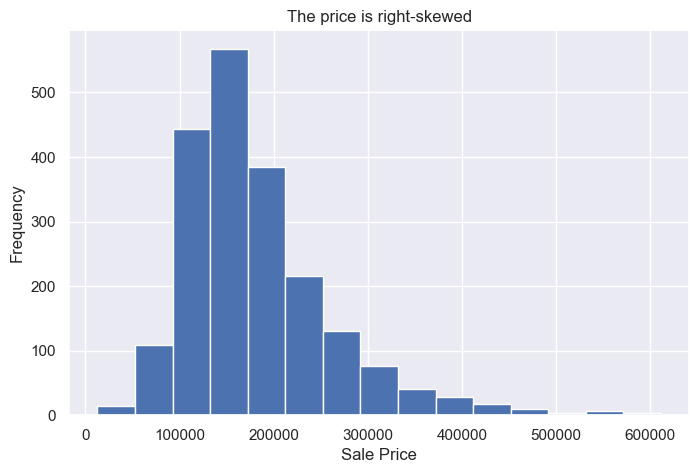

In [138]:
plt.hist(train_ori['SalePrice'], bins=15)
plt.title('The price is right-skewed')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

The sale price is skewed right due to a few houses have very high sale price.

We are going to break the dataset into two parts, one with numerical data and the other with categorical data.

In [139]:
# Retrieve only numerical data.
train_numeric = train_ori.select_dtypes('number')
train_numeric.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [140]:
# Retrieve only categorical data.
train_category = train_ori.select_dtypes(object)
train_category.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


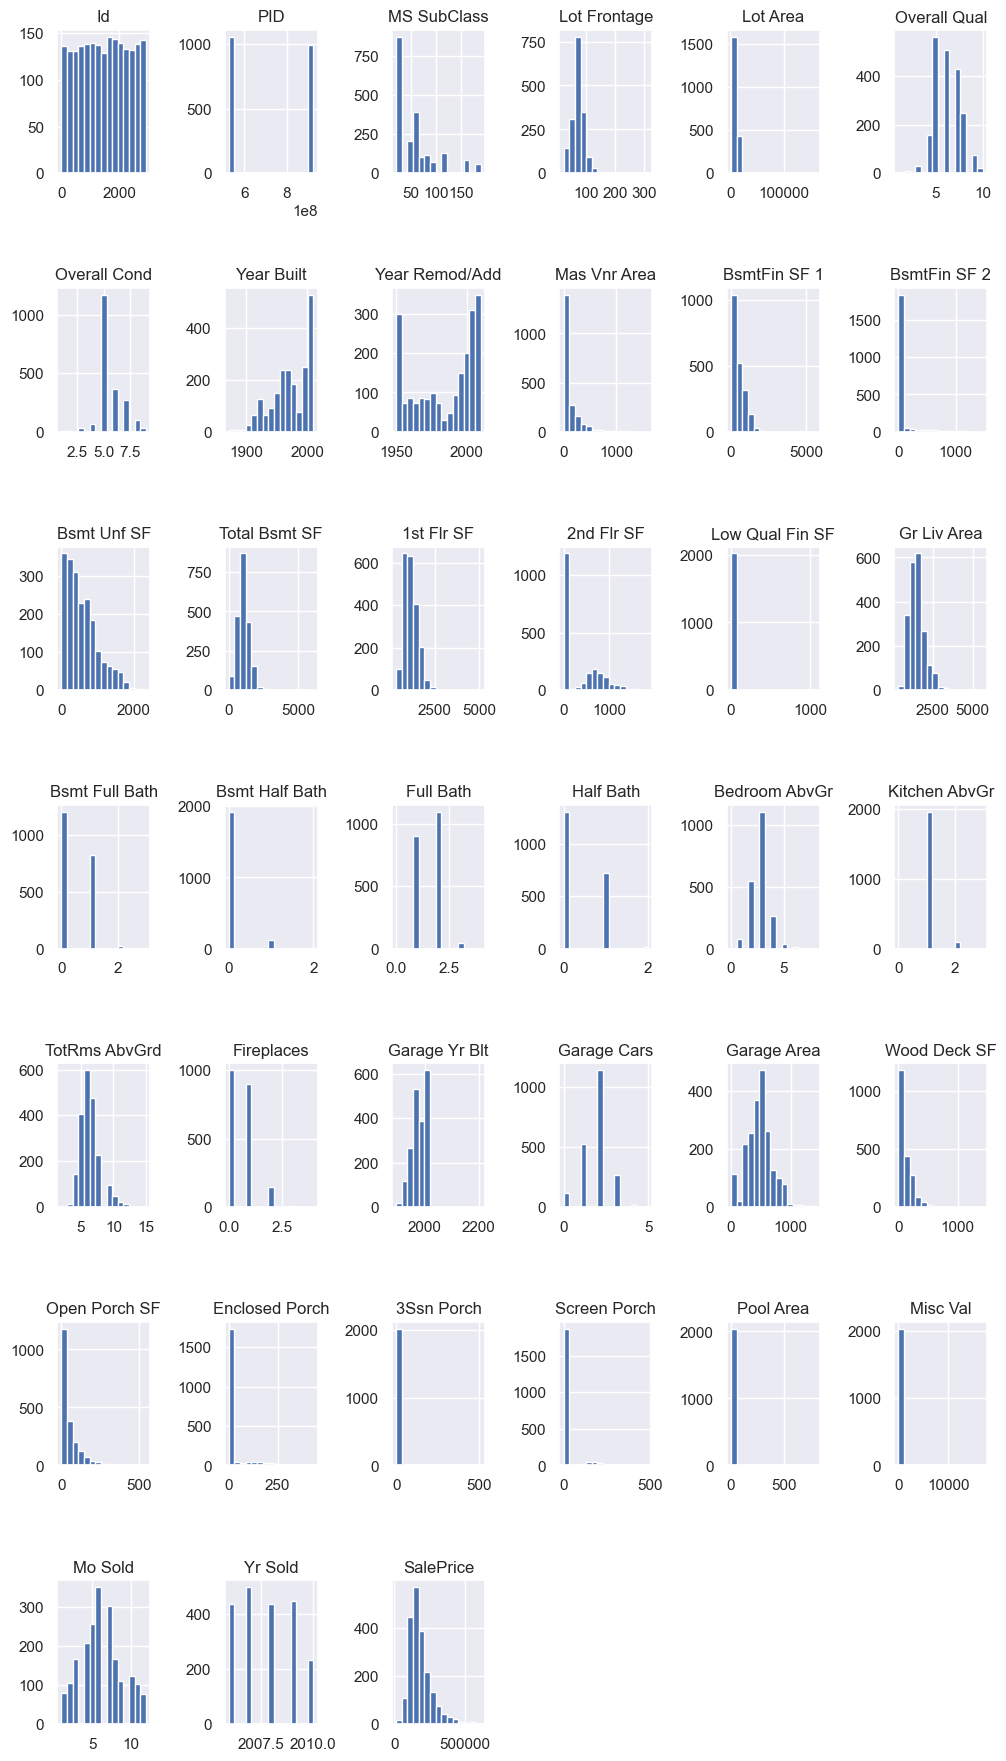

In [141]:
# Plot the histogram of numerical data.
train_numeric.hist(bins=15, figsize=(12,22))
plt.subplots_adjust(hspace=0.8, wspace=0.8);

Most of the features are not normally distributed.

We will also take a look at the correlation of the numerical data.

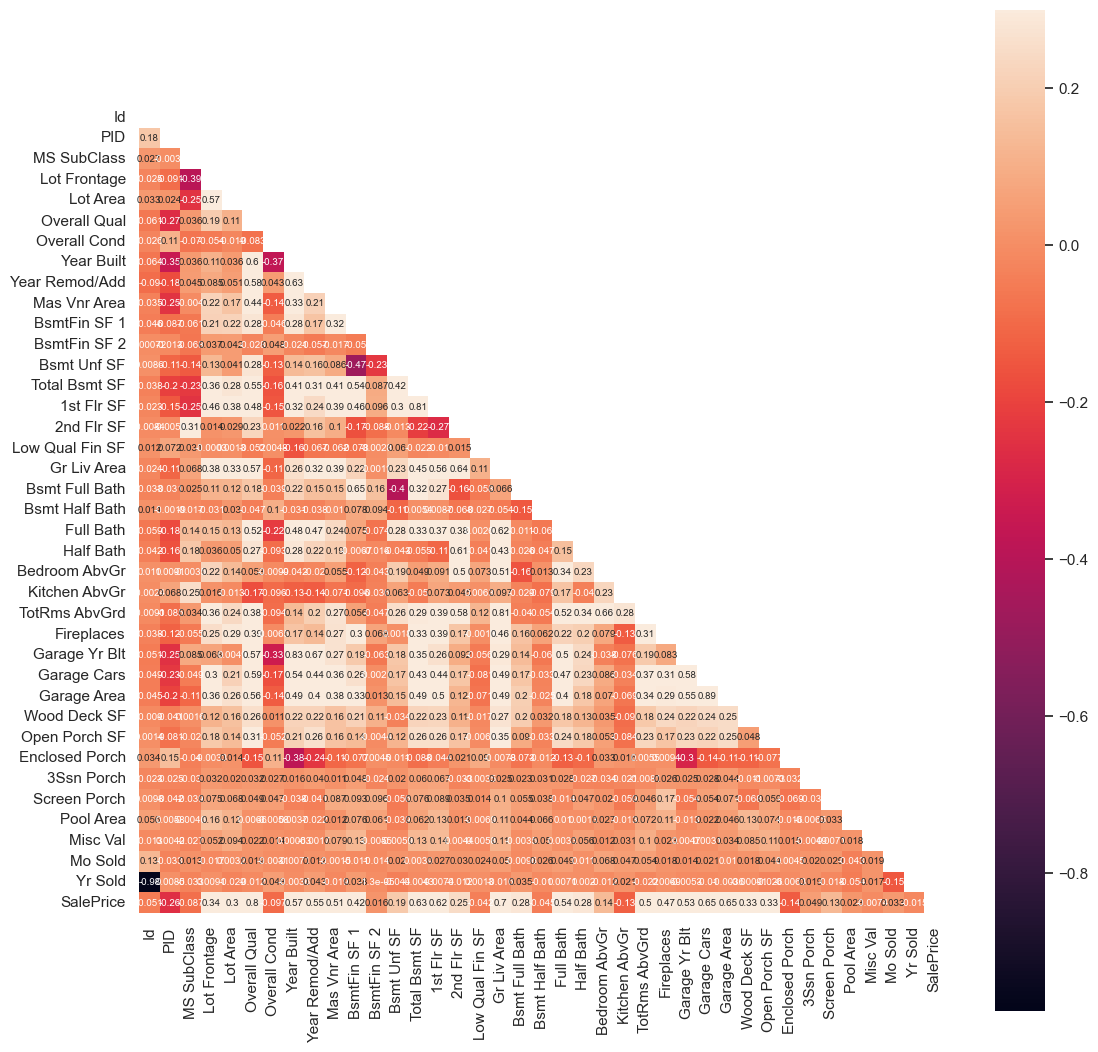

In [142]:
# Correlation of numerical data.
train_numeric_corr = train_numeric.corr()

# Plot the correlation of numerical data.
sns.set(rc={'figure.figsize':(12,10)})
mask = np.zeros_like(train_numeric_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(train_numeric_corr, mask=mask, vmax=.3, square=True,annot=True, annot_kws={"size":7})

One thing we have to take note here is the correlation between Year Built and Garage Yr Blt. The correlation is high, we can assume that most of the garage are built in the same years as the house.

For some features, there are very high count of 0's. This could be due to that particular feature is not applicable to the house. For example, the basement, porch, pool and etc.

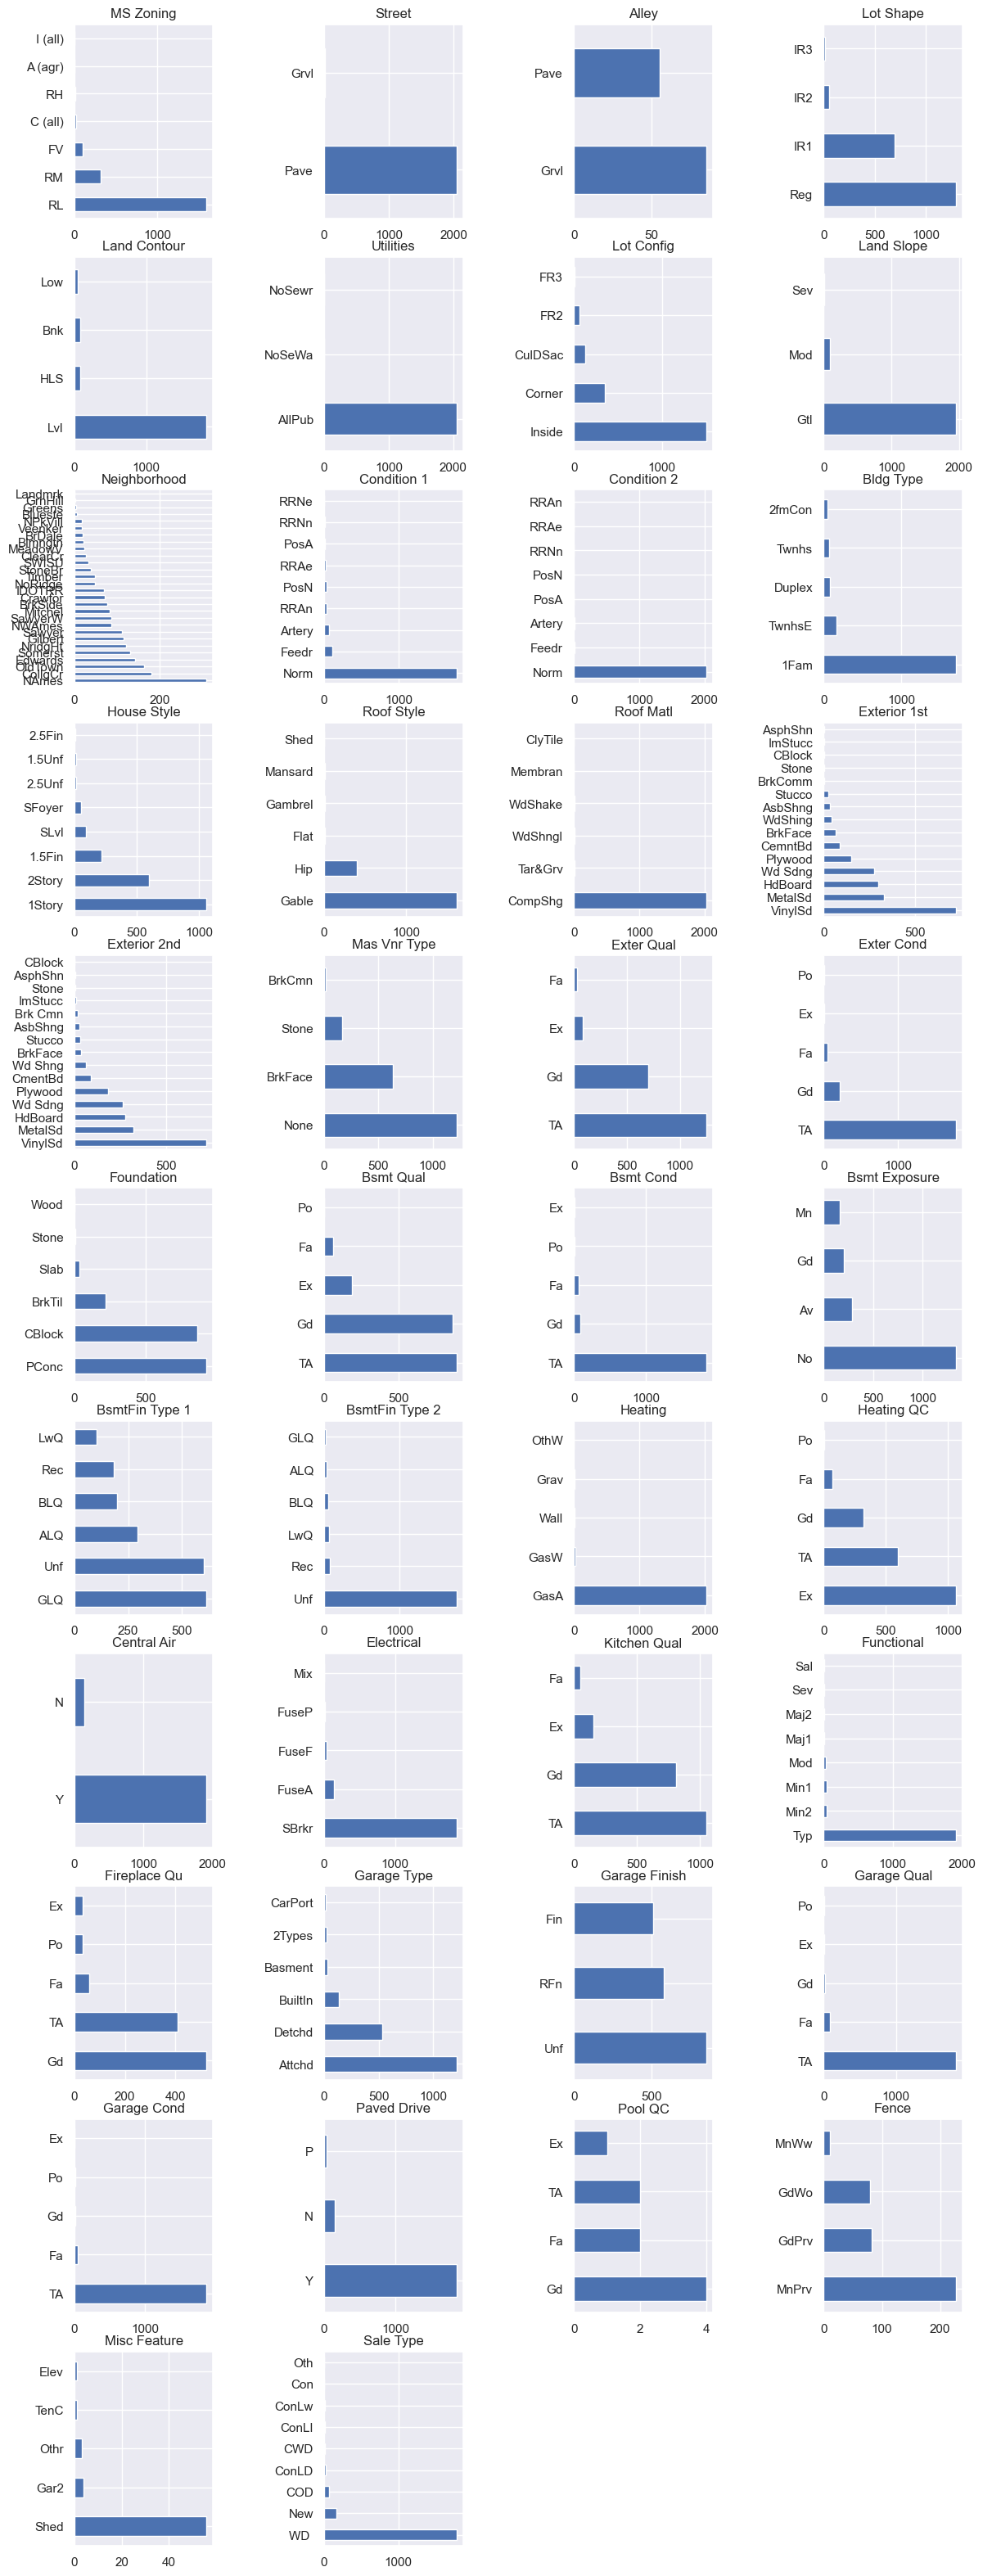

In [143]:
# Plot the distribution of categorical data.
n_string_features = train_category.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 40))

for feature_name, ax in zip_longest(train_category, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    train_category[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

This graph lets us see clearly which features have many categories and how is the distribution. We may need to refer to this graph when imputing missing values. Some of the features for example Neighborhood, Exterior and BsmtFin Type are fairly well ditributed. Some features such as Utilities and Street are extremely skewed.

## Data Cleaning

Before we start filling the missing values, we make a copy of the datasets and we will work on the copied dataset so that we can have a comparison on the original dataset and the processed dataset.

In [144]:
# Remove Id and PID columns.
train=train_ori.copy().drop(columns=['Id','PID'])

We dropped the Id and PID columns because these columns do not contribute to our modeling. They are just identification number for different sales order.

In [145]:
# Look at the Lot Config of rows with missing Lot Frontage.
train[train['Lot Frontage'].isnull()]['Lot Config'].head()

0     CulDSac
7      Inside
8      Inside
23     Inside
27     Inside
Name: Lot Config, dtype: object

From the lot config, we can deduce that the lot frontage values are missing and are not supposed to be empty.

In [146]:
# Determine the mean Lot Frontage are of various Lot Config.
train_lotsubset = train[['Lot Frontage','Lot Config']]
train_lotsubset.groupby(['Lot Config']).mean()

,Lot Frontage
Lot Config,
Corner,83.245552
CulDSac,55.228571
FR2,60.836735
FR3,87.000000
Inside,66.952780


I try to determine the lot frontage mean value based on the lot config. Then, we can fill in the empty cell of lot frontage using these mean values.

In [147]:
# Fill in missing Lot Frontage value with mean.
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Config'].map({
    'Corner':83.2,'CulDSac':55.2,'FR2':60.8,'FR3':87.0,'Inside':67.0}))

After that, we fill in 0 for missing values in "Alley" column because we deduced that there is no alley access.

In [148]:
# Fill in empty value of Alley.
train['Alley'].fillna(0,inplace=True)

Then we fill in 0 for missing values in "Mas Vnr Type" and "Mas Vnr Area" columns becasue we deduced that there is no masonry veneer for these houses.

In [149]:
# Fill in empty value of Mas Vnr Type.
train['Mas Vnr Type'].fillna(0,inplace=True)

# Fill in empty value of Mas Vnr Area.
train['Mas Vnr Area'].fillna(0,inplace=True)

Before we fill missing values of basement features, we need to fill in the particular row with missing BsmtFin Type 2 value but there is other basement features value. From the category bar graph plotted previously, the highest count of category of BsmtFin Type 2 is Unf, hence we will fill with this category.

In [150]:
# Locate the missing BsmtFin Type 2 row which is not supposed to be empty.
train[(train['BsmtFin Type 2'].isnull()) & ~train['BsmtFin SF 2'].isnull() & train['BsmtFin SF 2']!=0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,20,RL,85.0,10655,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


In [151]:
# Fill in the particular missing BsmtFin Type 2
train.iloc[1147,34] = 'Unf'

For the rest of the basement features with missing values, we will fill with 0.

In [152]:
# Create a mask for all basement features.
bsmt_mask = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2',\
    'Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

In [153]:
# Fill in empty value of remaining basement features.
train[bsmt_mask] = train[bsmt_mask].fillna(value=0)

For Fireplace, Pool QC, Fence and Misc Feature, we will fill missing value with 0.

In [154]:
# Fill in empty value of other features.
train[['Fireplace Qu','Pool QC','Fence','Misc Feature']] = \
    train[['Fireplace Qu','Pool QC','Fence','Misc Feature']].fillna(value=0)
    

For garage columns, recall that there is one row that has missing value on the all garage columns except garage type. We will impute missing values.

Previously when looking at the correlation heat map, we assumed that garages is usually built in the same year as the house. Therefore, we fill the missing value same as the year built.

In [155]:
train.loc[1712,'Garage Yr Blt'] = train.loc[1712,'Year Built']

For other garage features, we fill the missing value with mode of each column if it is categorical and mean value of each column if it is numerical.

In [156]:
# Fill in the empty garage features which are not supposed to be empty.
train.loc[1712,'Garage Finish'] = statistics.mode(train['Garage Finish'])
train.loc[1712,'Garage Qual'] = statistics.mode(train['Garage Qual'])
train.loc[1712,'Garage Cond'] = statistics.mode(train['Garage Cond'])
train.loc[1712,'Garage Cars'] = ceil(np.mean(train['Garage Cars']))
train.loc[1712,'Garage Area'] = np.mean(train['Garage Area'])

The other remaining missing values will be filled with 0.

In [157]:
# Create a mask for garage features.
garage_mask = ['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']

# Fill in empty value of the remaining garage features.
train[garage_mask] = train[garage_mask].fillna(value=0)

In [158]:
# Cross check if we have filled all empty values.
sum(train.isnull().sum())

0

This step above is to cross check did we missed out any missing value.

We can combine column Bsmt Full Bath and Bsmt Half Bath into a single column. Same goes to Full Bath and Half Bath, we can combine these two columns into a single column.

In [30]:
# Combining half bath and full bath into a single feature.
train['Bsmt Total Bath'] = train['Bsmt Full Bath'] + (train['Bsmt Half Bath'])/2
train['Total Bath'] = train['Full Bath'] + (train['Half Bath'])/2
train = train.drop(columns=['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'])

Now we have the cleaned dataset named "train" which will be used for our preliminary modeling.

Save the numerical data without missing values into new variable name for future feature engineering.

In [31]:
# Numerical portion of dataset.
train_numeric_noms = train.select_dtypes('number')

We will take a look at the distribution of categorical columns again.

In [32]:
# Categorical portion of dataset.
train_category_noms = train.select_dtypes(object)

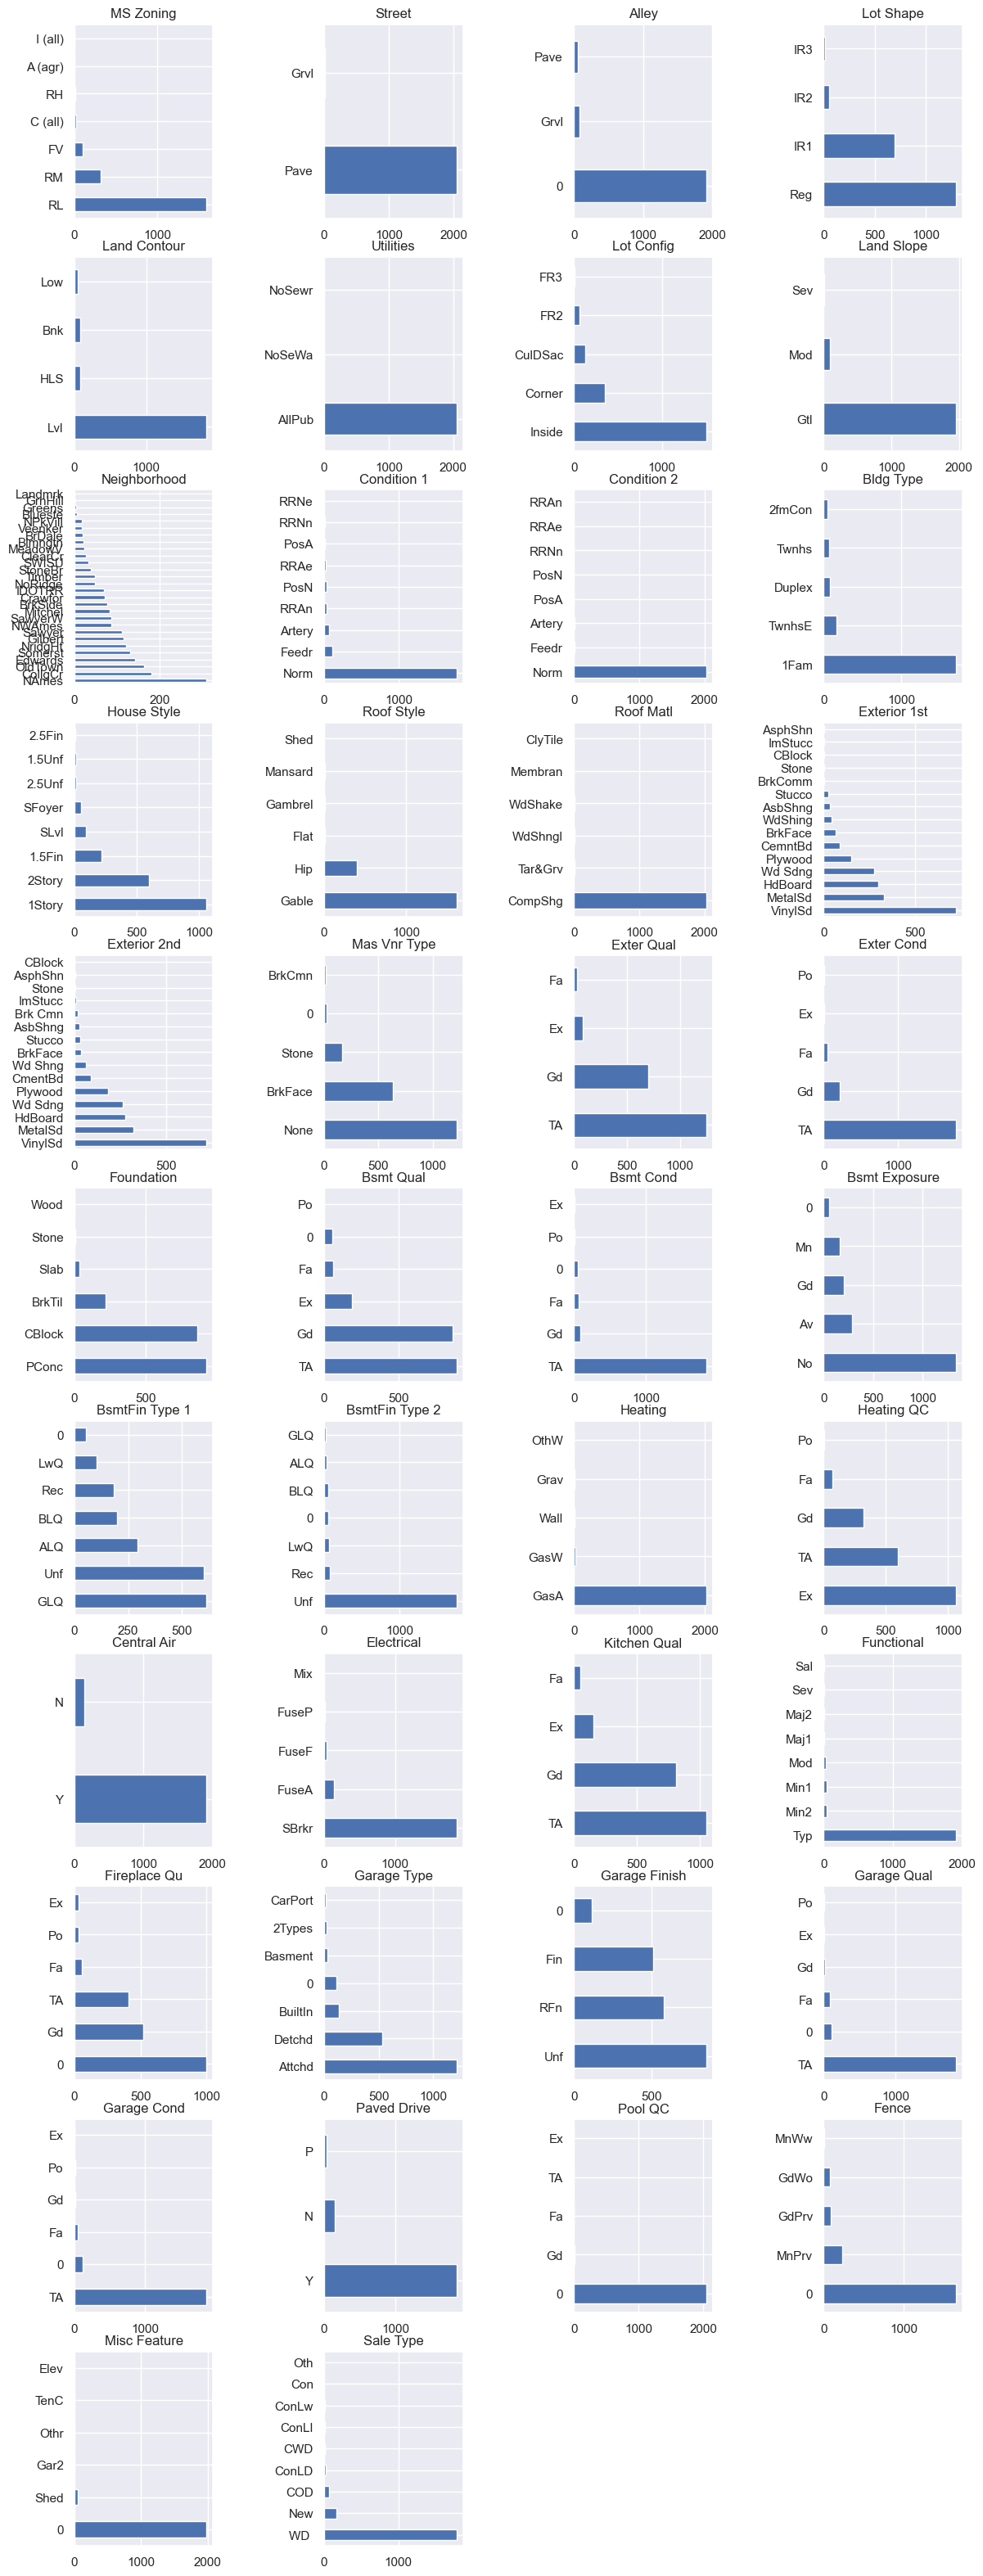

In [33]:
# Plot distribution of categorical features.
n_string_features = train_category_noms.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 40))

for feature_name, ax in zip_longest(train_category_noms, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    train_category_noms[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

From the graph above, there are quite a number of features that are not normally distributed. Many of the features are heavily biases to one category for example, the Street, Utilities, Condition 2 and Pool QC. This gives us a warning that it might not be a good idea to include all the features for modeling.

## Preprocessing

One-hot encode categorical variables.

In [34]:
# Initialize the process by creating a mask for categorical features.
categories=list(train_category_noms.columns)

Although data type of Ms SubClass is integer, we should treat it is categorical data because each value represent a type of sub class.

In [35]:
# Include MS SubClass into categories.
categories.insert(0,'MS SubClass')

In [36]:
# One-hot encoding categorical features.
train = pd.get_dummies(train, 
                       columns = categories,
                       drop_first=True)

In [37]:
train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Bsmt Total Bath,Total Bath,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),...,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,55.2,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,0.0,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,1.0,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,0.0,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
train.shape

(2051, 275)

The total columns has increased to 275 after one-hot encoding.

Then, we will split the train dataset into X and target y.

In [39]:
# Set up X and y for train test split.
X = train.drop(columns='SalePrice')
y = train.SalePrice

In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

In [41]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1640, 274)
(411, 274)
(1640,)
(411,)


## Baseline Model

From our experience of checking for house prices, we will normally take into consideration of the area and overall quality. We will use this for our baseline model.

In [42]:
# Use simple linear regression with only Lot Are and Overall Qual as our features  for baseline model.
lr = LinearRegression()

X_train_subset = X_train[['Lot Area','Overall Qual']]
X_test_subset = X_test[['Lot Area','Overall Qual']]
lr.fit(X_train_subset, y_train)

LinearRegression()

In [43]:
baseline_score = lr.score(X_test_subset,y_test)
print (f' Baseline model R2 score is: {baseline_score}')

 Baseline model R2 score is: 0.7142968805431572


By using only Lot Area and Overall Quality we are able to explain 71% of the Sale Price which is pretty good considering there were more than 80 features in the original dataset.

In [44]:
# Average cross validation score.
np.mean(cross_val_score(lr, X_train_subset, y_train, cv=5))

0.6722654071192767

Cross validation score of our baseline model is slightly lower, at about 67% but it is not too far away from our test score. Even when the property owner did not give us most of the property information, we are able to predict the price of the house to about +/-30% of the actual value with only the lot area and overall quality.

## Modeling Part 1

Once we have completed our baseline model, we move on to improve our model. We have to standardize the scale of all the features before we can proceed further because some of the features have different scale, for instance the lot area and number of bathroom.

In [45]:
# Standardize X_train and X_test.
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

After standardizing, we can fit the standardized dataset with all the features included into the model. However, we can foresee the model is not going to work well because there are a lot of noise.

In [46]:
# Train the model with standardized X_train.
lr.fit(X_train_ss,y_train)

LinearRegression()

In [47]:
# R2 score of linear regression model using all features given.
All_score = lr.score(X_test_ss,y_test)
print (f' All features model score is: {All_score}')

 All features model score is: -4.6009062687285534e+21


It is not a surprise that the model is not doing well at all because there are too much noise included when we include all the features.

Now we will introduce regularization by using Ridge and Lasso.

In [48]:
# Set the range of alphas for Ridge.
ridge_alphas = np.logspace(0, 5, 200)

# To find the optimal alpha value.
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_ss, y_train)

print (optimal_ridge.alpha_)

517.092024289676


In [49]:
# Initialize Ridge model with the optimal alpha value.
ridge = Ridge(alpha=optimal_ridge.alpha_)
# Cross validation score of Ridge model.
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.87452129 0.89002016 0.89193898 0.90627036 0.78735248]
0.8700206536717185


In [50]:
# Train the Ridge model.
ridge.fit(X_train_ss, y_train)

# R2 score of the test set.
ridge.score(X_test_ss,y_test)

0.8397908717781926

In [51]:
ridge_predicts=ridge.predict(X_test_ss)

print (f'Root Mean Squared Error: {mean_squared_error(y_test, ridge_predicts, squared=False)}')

Root Mean Squared Error: 32980.5962678977


Cross validation score of the Ridge model is 0.87 while the R2 score on test set is slightly lower at 0.84. The model works quite well and the R2 score is higher than our baseline model.

In [52]:
# To find the optimal alpha value.
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(X_train_ss, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

714.483648678067


.......................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


In [53]:
# Initialize Lasso model with the optimal alpha value.
lasso = Lasso(alpha=optimal_lasso.alpha_)
# Cross validation score of Lasso model.
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.88255849 0.88413904 0.89614589 0.90728686 0.75282162]
0.8645903799205819


In [54]:
# Train the Lasso model.
lasso.fit(X_train_ss, y_train)

# R2 score with the test set.
lasso.score(X_test_ss, y_test)

0.8437015234296557

In [55]:
lasso_predicts=lasso.predict(X_test_ss)

print (f'Root Mean Squared Error: {mean_squared_error(y_test, lasso_predicts, squared=False)}')

Root Mean Squared Error: 32575.58675684297


Cross validation score and R2 score on test set with Lasso model are similar to the Ridge model with Lasso model works better with the test set because R2 score of test set with Lasso is 0.843 while R2 score of test set with Ridge is 0.84. RMSE of both models are around 199,000 which proves that the actual data are quite far away from the regrression line this could be due to outliers.

The R2 scores after using Ridge or Lasso are much better than the first linear regression in Modeling Part 1. The R2 scores of Ridge and Lasso are also better than our baseline model and both Ridge and Lasso have similar cross validation score, 0.87 and 0.8646 respectively. The reason is because the features are regularized by Ridge or Lasso and hence minimizing the noise generated from features that are not as important to our model. We will go back to feature engineering to further fine tune the features. 

## Data Processing Part 2

This round, we will take only the numerical features into consideration and the previous one-hot encoded features will be ignored. The reason is because many of the categorical features have very high count on one category and very low count on the other categories. Previously we have saved the numerical data without missing value in Data Cleaning steps. We will check the correlation and plot the heatmap to further identify the trend.

In [56]:
# Correlation of numerical features.
train_numeric_noms_corr = train_numeric_noms.corr()

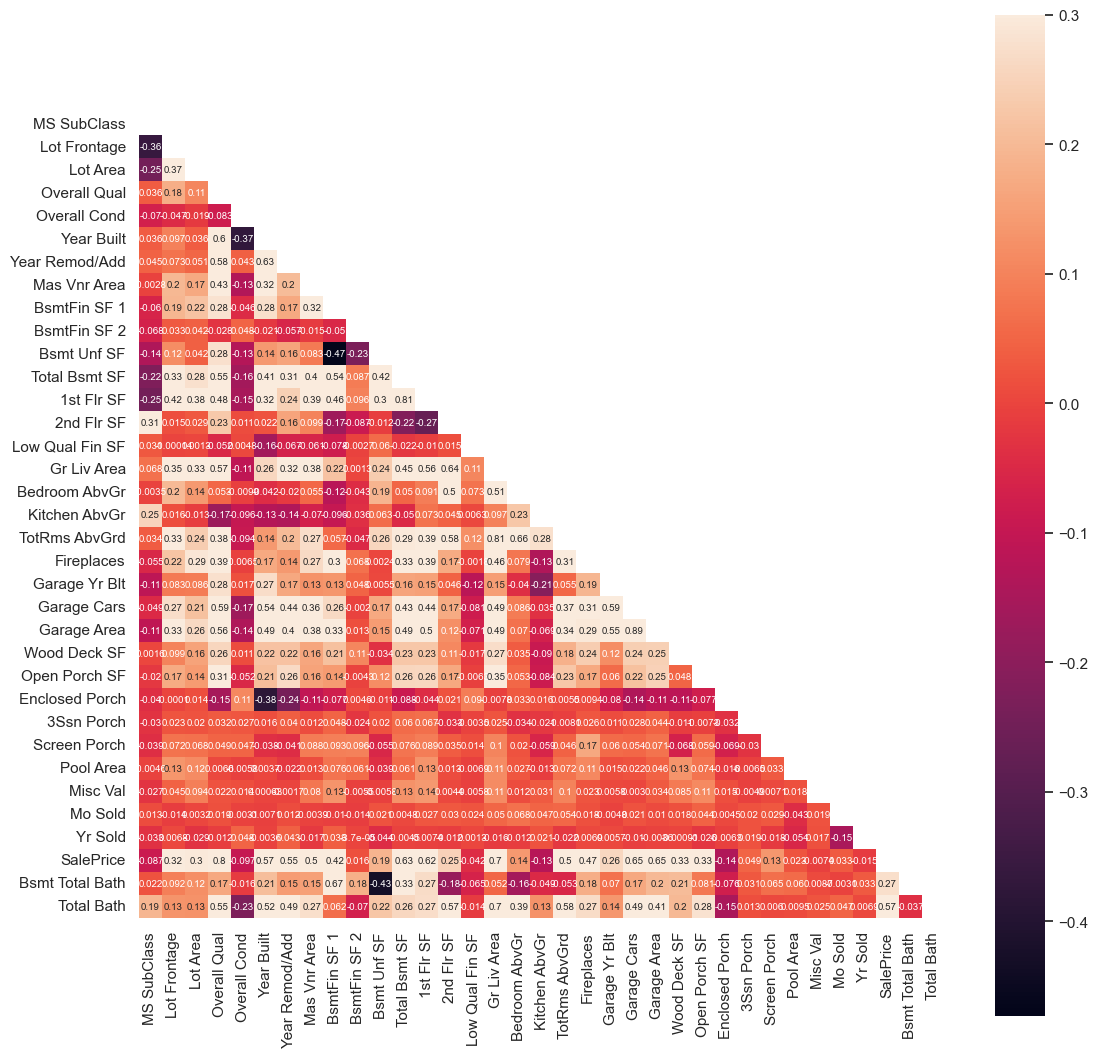

In [57]:
# Plot the heatmap of numerical features.
sns.set(rc={'figure.figsize':(12,10)})
mask = np.zeros_like(train_numeric_noms_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(train_numeric_noms_corr, mask=mask, vmax=.3, square=True,annot=True, annot_kws={"size":7})

In [58]:
# Create a mask of all features with correlation higher than 0.5 with the SalePrice.
features = list(train_numeric_noms_corr[abs(train_numeric_noms_corr['SalePrice'])>0.5]['SalePrice'].index)

From the correlation, we will only select the features with correlation higher than 0.5 with the SalePrice. We assume any features with correlation lower than 0.5 are not significant or no effect in predicting the SalePrice.

After filtering the features with correlation higher than 0.5, we have to detect if there is any multicollinearity because it will weaken the statistical power of our regression model.

In [59]:
# Creating new variable with only the features in the mask above.
X_variables = train_numeric_noms[features]

In [60]:
# Determine Variance Inflation Factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [61]:
vif_data

,feature,VIF
0,Overall Qual,60.667728
1,Year Built,9058.567738
2,Year Remod/Add,8910.262040
3,Mas Vnr Area,1.850170
4,Total Bsmt SF,22.201645
5,1st Flr SF,34.998552
6,Gr Liv Area,59.796770
7,TotRms AbvGrd,55.854408
8,Garage Cars,36.763833
9,Garage Area,32.589563


From the output above, Year Built and Year Remod/Add have very high VIF. We will retain Year Built out of the two features mentioned because Year Built has the highest correlation with Sale Price as compared to the other features.

In [62]:
# Remove the column with multicollinearity.
train_numeric_optimized=train_numeric_noms[features].drop(columns='Year Remod/Add')

We would also need to convert the Year Built to age.

In [63]:
# Create a new column for age.
train_numeric_optimized['Age'] = 2022-train_numeric_optimized['Year Built']

In [64]:
# Drop the Year Built column since we already have the age.
train_numeric_optimized.drop(columns=['Year Built','SalePrice'],inplace=True)

In [65]:
train_numeric_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2051 non-null   int64  
 1   Mas Vnr Area   2051 non-null   float64
 2   Total Bsmt SF  2051 non-null   float64
 3   1st Flr SF     2051 non-null   int64  
 4   Gr Liv Area    2051 non-null   int64  
 5   TotRms AbvGrd  2051 non-null   int64  
 6   Garage Cars    2051 non-null   float64
 7   Garage Area    2051 non-null   float64
 8   Total Bath     2051 non-null   float64
 9   Age            2051 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 160.4 KB


We will convert the sale price to log scale to shift the distribution towards normal distribution.

In [66]:
# Converting the SalePrice to log scale.
y = np.log(y)

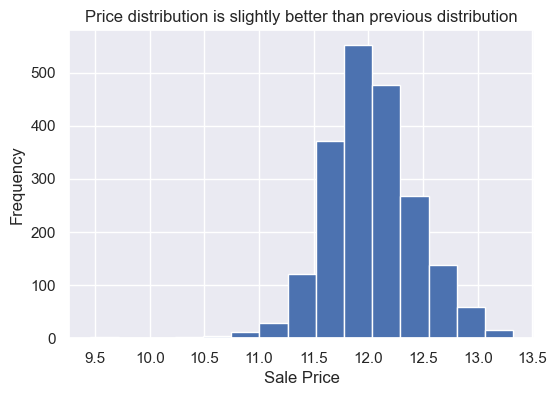

In [67]:
# Plot the distribution of SalePrice after converting to log scale.
plt.figure(figsize=(6,4))
plt.hist(y, bins=15)
plt.title('Price distribution is slightly better than previous distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

After converting the sale price to logarithmic scale, the distribution of sale price is slightly better than previous histogram. It is now with less skewedness.

## Modeling Part 2

In the next steps within Modeling Part 2, we will perform linear regression with the new optimized X variables.

In [68]:
# Split optimized dataset into train and test sets 
X_train_op, X_test_op, y_train, y_test = train_test_split(train_numeric_optimized, y, test_size=0.2, random_state=120)

# Standardize the values of variables
sc = StandardScaler()
# Fit and transform the train data
X_train_ops = sc.fit_transform(X_train_op)
# Transform the test data
X_test_ops = sc.transform(X_test_op)

# Initialize the regression model
lr1 = LinearRegression()
# Train the model
lr1.fit(X_train_op, y_train)

# Display the training score
print (lr1.score(X_train_op, y_train))
# Display the testing score
print (lr1.score(X_test_op, y_test))

0.8239754579363464
0.7702069554872076


In [106]:
lr1_predicts = np.exp(lr1.predict(X_test_op))

print (f'Root Mean Squared Error: {mean_squared_error(np.exp(y_test), lr1_predicts, squared=False)}')

Root Mean Squared Error: 129467.33485416573


RMSE is much better as compared to Ridge and Lasso model in Modeling Part 2 which means that even the R2 score is lower, but our predicted values are actually closer to the actual value and there is no outlier.

We will cross validate our scores with cross_val_score


In [70]:
# Cross validate training scores
print (f'Cross_val_score of training data: {np.mean(cross_val_score(lr1, X_train_op, y_train))}')

Cross_val_score of training data: 0.8074544808642278


The optimized model with only 11 features works much better than our linear regression model in Modeling Part 1.  Most of the features which are not contributing to the prediction of the SalePrice have been removed in this model. The score is not as good as compared to Ridge and Lasso but it is much better than baseline model. To make sure we did not accidentally removed important categorical features, we will prepare another model with SelectKBest as our feature selection model.

## Modeling Part 3

We will use the original cleaned data from Preprocessing section which includes all one-hot encoded categorical features and no empty value.

In [71]:
# Split the original dataset into train and test sets. Random state is set at 121.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

To run SelectKBest function, we have to decide how many features we want to retain. Since we do not know what is the best number to use, we will run the function with different number of features, starting from 10.

In [72]:
# Set the number of features starting from 10, increment by 10.
k = list(range(10,271,10))

A function is created to simplify the process. The model will be generated more than 20 times, each with different K value. R2 scores of training data and testing data of each K value will be saved for further investigation.

In [73]:
# Function of features selection.
def features_selection (X_train, X_test, y_train, y_test, k):
    # Initialize the R2 scores and K values storage.
    train_scores = []
    test_scores = []
    k_values = []
    
    # Loop through each K values.
    for k_value in k:
     # Initialize the SelectKBest function with a K value.
     fs = SelectKBest(score_func = f_regression, k = k_value)
     # Fit the feature selection model.
     fs.fit(X_train, y_train)
     # Transform the train and test sets.
     X_train_fs = fs.transform(X_train)
     X_test_fs = fs.transform(X_test)
     
     # Initialize the Linear Regression model.
     model = LinearRegression()
     # Train the model with data modeled from SelectKBest.
     model.fit(X_train_fs, y_train)
     
     # Store the train and test score and K values into the list variables.
     train_score = model.score(X_train_fs, y_train)
     test_score = model.score(X_test_fs, y_test)
     train_scores.append(train_score)
     test_scores.append(test_score)
     k_values.append(k_value)
    
    return train_scores, test_scores, k_values
	

In [74]:
# Call the features selection function.
train_scores, test_scores, k_values = features_selection (X_train, X_test, y_train, y_test, k)

In [75]:
# Combine the three lists generated from features selection function into a dataframe.
k_best_scores = pd.DataFrame({'training_score':train_scores,
                              'testing_score':test_scores,
                              'K_values':k_values})

In [76]:
k_best_scores.head()

,training_score,testing_score,K_values
0,0.821113,0.826245,10
1,0.835850,0.839137,20
2,0.850722,0.855168,30
3,0.862612,0.861813,40
4,0.867534,0.863208,50


In [77]:
# Check what is the best test score and the respective K value.
k_best_scores[k_best_scores['testing_score']==k_best_scores['testing_score'].max()]

,training_score,testing_score,K_values
13,0.90833,0.890138,140


When we limit the features to the top 140 features, we will achieve the highest test score at 0.8901. 

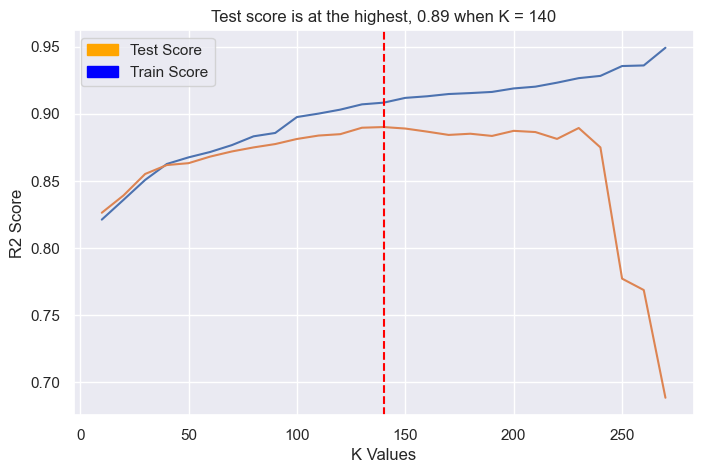

In [78]:
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(data=k_best_scores, x='K_values',y='training_score')
sns.lineplot(data=k_best_scores, x='K_values',y='testing_score')
plt.xlabel('K Values')
plt.ylabel('R2 Score')
plt.title('Test score is at the highest, 0.89 when K = 140')
orange_patch = mpatches.Patch(color='orange', label='Test Score')
blue_patch = mpatches.Patch(color='blue',label='Train Score')
plt.legend(handles=[orange_patch,blue_patch])
plt.axvline(x=140, color='red',ls='--');

Cross_val_score of the model will be performed for cross validation.

In [79]:
# Initialize the SelectKBest function with a K value = 140
fs140 = SelectKBest(score_func = f_regression, k = 140)
# Fit the feature selection model.
fs140.fit(X_train, y_train)
# Transform the train dataset.
X_train_fs140 = fs140.transform(X_train)
X_test_fs140 = fs140.transform(X_test)

# Initialize the Linear Regression model.
model140 = LinearRegression()
# Average cross validation score.
np.mean(cross_val_score(model140, X_train_fs140, y_train))


0.8326472427494591

In [80]:
# Listing out the coefficient of each feature in descending order.
feature_coef = pd.DataFrame({'Feature':X_train.columns, 'Coefficient': fs140.scores_})
feature_coef.sort_values(by='Coefficient', ascending=False).head(10)


,Feature,Coefficient
2,Overall Qual,3580.637785
14,Gr Liv Area,1458.924655
20,Garage Cars,1260.880215
21,Garage Area,1163.268009
10,Total Bsmt SF,1039.411401
4,Year Built,1009.884462
32,Total Bath,923.916073
5,Year Remod/Add,903.062258
11,1st Flr SF,888.452949
168,Exter Qual_TA,851.601828


This table shows the top 10 features in term of coefficient. We have selected top 140 features when modeling.

In [81]:
model140.fit(X_train_fs140, y_train)

model140.score(X_test_fs140,y_test)

0.890137859811365

In [105]:
model140_predicts = np.exp(model140.predict(X_test_fs140))

print (f'Root Mean Squared Error: {mean_squared_error(np.exp(y_test), model140_predicts, squared=False)}')

Root Mean Squared Error: 23914.714072188213


Cross validation score is only 0.8326, not as high as Ridge and Lasso. However, the R2 score of test set is the best amongst all the models. Besides that, this model has the lowest RMSE which shows that the predictions are very close to the actual value and no outliers.

After running through feature selection with SelectKBest, we realized that when we limit to only 140 features with the best scores, we will have the best model in terms of testing accuracy. The new linear regression model with 140 features has improved slightly as compared to the models in Modeling Part 1 and Modeling Part 2. Cross validation score in Modeling Part 3 is higher than Modeling Part 2, because there are many important features being ignored in Modeling Part 2 when we are only looking at the numerical features. For example, the neighborhood, existance of pool and etc. However, the highest cross validation score is in Modeling Part 1 with Ridge. 
Finally, we are going to use the model in Modeling Part 3 because it works the best for the test set, which is a new data to the model. In other words, this model generally works very well when given new datasets which is the key point for making predictions in the future.

## Prediction with test.csv

In order to predict the SalePrice with the test set, we will first clean the test set by following the steps in Data Cleaning.

In [83]:
# Check for empty value.
test_ori.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [84]:
# Fill in the empty values.
test = test_ori.copy().drop(columns=['Id','PID'])
test['Lot Frontage'] = test['Lot Frontage'].fillna(test['Lot Config'].map({
    'Corner':83.2,'CulDSac':55.2,'FR2':60.8,'FR3':87.0,'Inside':67.0}))
test['Alley'].fillna(0,inplace=True)
test['Mas Vnr Type'].fillna(0,inplace=True)
test['Mas Vnr Area'].fillna(0,inplace=True)
test[bsmt_mask] = test[bsmt_mask].fillna(value=0)
test[['Electrical','Fireplace Qu','Pool QC','Fence','Misc Feature']] = \
    test[['Electrical','Fireplace Qu','Pool QC','Fence','Misc Feature']].fillna(value=0)
test[garage_mask] = test[garage_mask].fillna(value=0)

In [85]:
# Cross check if we missed out any empty value.
sum(test.isnull().sum())

0

In [86]:
# One-hot encoding categorical features.
test = pd.get_dummies(test, 
                       columns = categories,
                       drop_first=True)

In [87]:
test.shape

(878, 257)

It has 274 features after one-hot encoding in the train set, but there is only 257 features in the test set. Some of the features are missing which is mainly due to the features category are not applicable to the houses in test set. Besides that, there are some new categories that are not seen in training data. We will ignore those data because our model is not trained with them.

In [88]:
# Adding missing features in the test data.
for feature in X.columns:
    if feature not in test.columns:
        test[feature] = 0

In [89]:
# Removing features that are not seen in training data.
for feature in test.columns:
    if feature not in X.columns:
        test.drop([feature], axis=1, inplace=True)

In [90]:
# Rearrange features sequence.
test = test[X.columns]

In [91]:
# Transform test data with feature selection.
test_fs140 = fs140.transform(test)
# Predicted saleprice is in log scale.
log_predicts = model140.predict(test_fs140)

In [92]:
# Converting SalePrice to non-log scale.
predicts = np.exp(log_predicts)

In [93]:
# Generating output as per required format.
output = pd.DataFrame(test_ori['Id'])
output['Saleprice'] = predicts

In [94]:
# Write to csv format.
output.to_csv('submission/output.csv', index=False)

# Conclusion

We have a tried a few methods and different models to determine which model works the best for the given dataset. 

|Model|In Section|R2 Score|RMSE|
|---|---|---|---|
|Linear Regression|Baseline Model|0.7142968805431572|Not calculated|
|Linear Regression|Modeling Part 1|-4.6009062687285534e+21|Not calculated|
|Ridge|Modeling Part 1|0.8397908717781926|199325.9060718847|
|Lasso|Modeling Part 1|0.8437015234296557|199147.08628262393|
|Linear Regression|Modeling Part 2|0.7702069554872076|211316.21018580042|
|Linear Regression|Modeling Part 3|0.890137859811365|189337.99587793052|

Out of all the models, Linear Regreasion in Modeling Part 3 with SelectKBest features has the highest R2 score in the test set and lowest RMSE, hence we have selected this model as our final model in predicting the house price. This model gives us highest confidence in predicting house sale price and the predicted values are the nearest to the actual value.

140 features are selected to be retained when performing the linear regression and the remaining features will be removed as they do not contribute much to the prediction of sale price. The given test set is cleaned accordingly and sale price has been predicted with the best model mentioned above.

